# Heisenberg model for a 1D chain of spins

I think that the simulation of many-body quantum systems will be the first area of application, where we will find quantum advantage.

Let's start by writing down the Heisenberg model [cite Ashcroft and Mermin] for a 1-D spin chain.

$$ \hat{H} = -\vec{J}\sum_{i}^{N-1} \sigma_{i}\otimes \sigma_{i+1} - \vec{h}\sum_{i}^{N} \sigma_{i}\;\;\;\;\;(1)$$    

where $\vec{J}$ is the nearest neighbors coupling, and $\vec{h}$ is an external magnetic field.

One important thing to notice is that the Heisenberg model deals with spins bound to their lattice positions and their time evolution. Qubits can interchangably be treated as spins, so the operator $\sigma^{z}$ (for a spin) is the $Z$ gate for a qubit. In other words, to implement the Heisenberg model in a quantum computer we do not need to go through transformations from rising and lowering operators to qubit gates, such as the Jordan Wigner transformation [cite JW].

Now, we focus in the system's evolution. Let's start with the  Schr$\ddot o$dinguer equation

$$ i\hbar \frac{\partial|\psi(t)>}{\partial t} = \hat{H} |\psi>\;\;\;\;\;(2)$$

Let's assume that the Hamiltonian is time-independent (as it is for the 1-D Heisenberg model). Then the solution is

$$ |\psi(t)> = e^{-i\hbar t \hat{H}}|\psi(0)>\;\;\;\;\;(3)$$

To be able to obtain the quantum system's time evolution with quantum computer we need to apply quantum gates to the quantum circuit to the initial state $ |\psi(0)> $

In general, the Hamiltonian can be written in the from 
$$\hat{H} = \hat{H}_{1} + \hat{H}_{2} + ... + \hat{H}_{N}\;\;\;\;\;(4)$$ 

If the Hamiltonians $\hat{H}_{i}$ commute with each other, the next identity holds:

$$ e^{-i \hbar t \hat{H}} = e^{-i \hbar t \hat{H}_{1}}e^{-i \hbar t\hat{H}_{2}}e^{-i \hbar t\hat{H}_{3}}...e^{-i \hbar t\hat{H}_{N}}\;\;\;\;\;(5)$$

If $\hat{H}_{i}$ do not commute, then we can proceed to find a solution with the first order Susuki-Trotter decomposition [cite Trotter decomposition]

$$ e^{-i \hbar tH} \simeq (e^{-i \hbar t H_{1}\Delta t}e^{-i \hbar t H_{2}\Delta t}e^{-i \hbar t H_{3}\Delta t}...e^{-i \hbar t H_{N}\Delta t})^{t/\Delta t}\;\;\;\;\;(6)$$

Then we define a Trotter step:

$$ e^{-i \hbar t H_{1}\Delta t}e^{-i \hbar t H_{2}\Delta t}e^{-i \hbar t H_{3}\Delta t}...e^{-i \hbar t H_{N}\Delta t}\;\;\;\;\;(7)$$

The Trotter number is defined as $t/\Delta t$. When the Trotter number tends to infinity we get the best accuracy to the approximation. Also, there are higher order Trotterizations [cite Trotter decomposition].

So far this is all we need to do the time evolution of quantum system. Here we are going to write down an algorithm related to the Heisenberg model with nearest neighbors interactions.

1. Write down the Hamiltonian in the form of equation (3).
2. If the terms commute then the exact solution is given by the equation (5).
3. If the terms do not commute use Trotterization: equation (7). 

## Case for nearest neighbor interaction off and a magnetic field along the z-direction

I will now write the Hamiltonian for a magnetic field along the z-direction and $\vec{J}=\vec{0}$

$$ \hat{H} = h_{z} \sum_{i}^{N}\sigma_{i}\;\;\;\;\;(8)$$

Then, let's start with the simplest and trivial case: one spin only

$$ \hat{H} = h_{z} \sigma_{1}^{z}\;\;\;\;\;(9)$$

Introducing equation (9) into (3) we get

$$ |\psi(t)> = e^{-it\hbar h_{z}\sigma_{1}^{z}}|\psi(0)>\;\;\;\;\;(10)$$

Now, to write equation (10) in a quantum circuit we need to apply the gate $e^{-it\hbar h_{z}\sigma^{1}_{z}} $ to $|\psi(0)>$. In qiskit, the gate that we need is the Z-rotation gate

$$ R_{z}(\theta) = e^{-i\frac{\theta}{2}\sigma^{z}}\;\;\;\;\;(11)$$

In our case, $\theta = 2t\hbar h_{z}$. For the case of N-spin

$$ e^{-it\hbar h_{z}\sum_{i}^{N}\sigma_{i}^{z}} = \prod_{i}^{N} e^{-it\hbar h_{z} \sigma_{i}^{z}}\;\;\;\;\;(12)$$

Equation (12) is the exact solution thanks to the fact that the Hamiltonians commute, so we do not need to do a Trotterization.

We can implement it in qiskit as follows

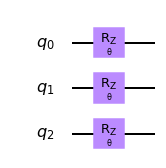

In [28]:
# Here we are importing all packages from qiskit
from qiskit import *
from qiskit.circuit import Parameter
from math import pi

# define the number of qubits
num_q = 3
theta = Parameter('θ')
# Here create the quantum circuit
qc = QuantumCircuit(num_q)

# Here we apply the Rz gate to the ith-qubit
for i in range(num_q):
    qc.rz(theta,i)

# Here we draw the quantum circuit
qc.draw(output='mpl')

## Case for nearest neighbor interactions turn off and a uniform magnetic field along x-,y-, and z- directions

The Hamiltonian for, the trivial case, of one spin is

$$ \hat{H} = h(\sigma^{x}_{1} + \sigma^{y}_{1} + \sigma^{z}_{1})\;\;\;\;\;(13)$$

and $\vec{h} = (h,h,h)$. In this case the Pauli matrices do not commute with each other, so it is time to use Trotterization to solve approximately this problem

$$ e^{-it\hbar \hat{H}} = e^{-it\hbar h(\sigma^{x}_{1} + \sigma^{y}_{1} + \sigma^{z}_{1})}\;\;\;\;\;(14)$$

After the Trotterization

$$ e^{-it\hbar \hat{H}} \simeq (e^{-i\Delta t \hbar h \sigma^{x}_{1}}e^{-i\Delta t \hbar h \sigma^{y}_{1}}e^{-i\Delta t \hbar h \sigma^{z}_{1}})^{t/\Delta t} \;\;\;\;\;(15)$$

A Trotter step is the expresion inside the parenthesis of equation (15). The Trotterization for the N-spin case is

$$ e^{-it\hbar \hat{H}} \simeq (e^{-i\Delta t \hbar h \sigma^{x}_{1}}e^{-i\Delta t \hbar h \sigma^{y}_{1}}e^{-i\Delta t \hbar h \sigma^{z}_{1}}e^{-i\Delta t \hbar h \sigma^{x}_{2}}e^{-i\Delta t \hbar h \sigma^{y}_{2}}e^{-i\Delta t \hbar h \sigma^{z}_{2}}...)^{t/\Delta t}\;\;\;\;\;(16)$$

Note that the exponential to the Puali matrices are the rotation gates along different axis, and $\theta=2\Delta t \hbar h$.

We can implement a Trotter step in qiskit as follows

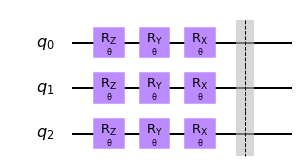

In [12]:
# define the number of qubits
num_q = 3
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here we apply the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(theta,i)
    qc.ry(theta,i)
    qc.rx(theta,i)
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

## Interaction ZZ term turn on and a uniform magnetic field along x-, y-, and z- directions

For such a case, the 2 spin Hamiltonian goes as follows:

$$ \hat{H} = J(\sigma_{1}^{z}\sigma_{2}^{z}) + h(\sigma_{1}^{x}+\sigma_{1}^{y}+\sigma_{1}^{z})+ h(\sigma_{2}^{x}+\sigma_{2}^{y}+\sigma_{2}^{z})\;\;\;\;\;(17)$$

where $\vec{J} = (0,0,J)$. Then 

$$ e^{-it\hbar \hat{H}} = e^{-it\hbar (J(\sigma_{1}^{z}\sigma_{2}^{z}) + h(\sigma_{1}^{x}+\sigma_{1}^{y}+\sigma_{1}^{z})+ h(\sigma_{2}^{x}+\sigma_{2}^{y}+\sigma_{2}^{z}))} \;\;\;\;\;(17)$$

A Trotter step is

$$ e^{-it \hat{H}} \simeq e^{-i\Delta t \hbar J(\sigma_{1}^{z}\sigma_{2}^{z})}e^{-i\Delta t \hbar h \sigma_{1}^{x}}e^{-i\Delta t \hbar h \sigma_{1}^{y}}e^{-i\Delta t \hbar h \sigma_{1}^{z}}e^{-i\Delta t \hbar h \sigma_{2}^{x}}e^{-i\Delta t \hbar h \sigma_{2}^{y}}e^{-i\Delta t \hbar h \sigma_{2}^{z}}\;\;\;\;\;(18)$$

We can use the identity

$$ e^{-i\Delta t \hbar J\sigma_{1}^{z}\sigma_{2}^{z}} = CNOT^{1,2}e^{-i\Delta t \hbar J\sigma_{2}^{z}}CNOT^{1,2}\;\;\;\;\;(19)$$

An plugging it in the previous equation we end up with

$$ e^{-it \hbar \hat{H}} \simeq CNOT^{1,2}e^{-i\Delta t \hbar J\sigma_{2}^{z}}CNOT^{1,2}e^{-i\Delta t \hbar h \sigma_{1}^{x}}e^{-i\Delta t \hbar h \sigma_{1}^{y}}e^{-i\Delta t \hbar h \sigma_{1}^{z}}e^{-i\Delta t \hbar h \sigma_{2}^{x}}e^{-i\Delta t \hbar h \sigma_{2}^{y}}e^{-i\Delta t \hbar h \sigma_{2}^{z}}\;\;\;\;\;(20)$$

We can generalize this equation to the N-spin case as follows

$$ e^{-it \hbar \hat{H}} \simeq \prod_{i}^{N-1}(CNOT^{i,i+1}e^{-i\Delta t \hbar J\sigma_{i+1}^{z}}CNOT^{i,i+1})\prod_{i}^{N-1}(e^{-i\Delta t \hbar h \sigma_{i}^{x}}e^{-i\Delta t \hbar h \sigma_{i}^{y}}e^{-i\Delta t \hbar h \sigma_{i}^{z}}e^{-i\Delta t \hbar h \sigma_{i+1}^{x}}e^{-i\Delta t \hbar h \sigma_{i+1}^{y}}e^{-i\Delta t \hbar h \sigma_{i+1}^{z}})\;\;\;\;\;(21)$$

This would be a Trotter step and $\theta=2\Delta t \hbar h$ and $\phi=2\Delta t \hbar J$. The implementation is Qiskit is as follows

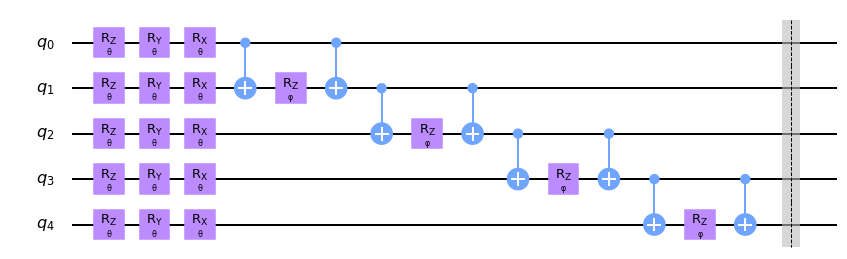

In [24]:
# define the number of qubits
num_q = 5
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)
phi = Parameter('φ')
# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(theta,i)
    qc.ry(theta,i)
    qc.rx(theta,i)
    
for i in range(num_q-1):
    qc.cx(i,i+1)
    qc.rz(phi,i+1)
    qc.cx(i,i+1)           
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

I notice that this specific way of implementing the gates is not efficient because the coupling between the 3rd and 4th qubit has to wait until the coupling between 2nd and 3rd qubit is excuted. We can reduce the circuit depth by grouping together the odd and even interactions.

The Qiskit implementation is as follows

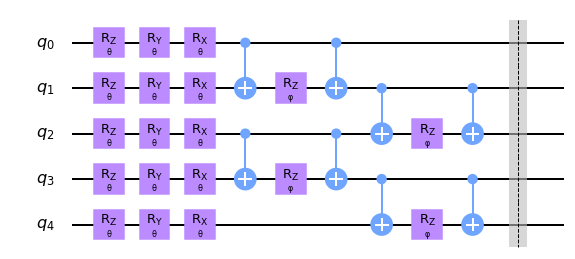

In [23]:
# define the number of qubits
num_q = 5
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(theta,i)
    qc.ry(theta,i)
    qc.rx(theta,i)
    
for i in range(num_q-1):
    if ((i%2)==0 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(phi,i+1)
        qc.cx(i,i+1)
    
for i in range(num_q-1):
    if ((i%2)==1 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(phi,i+1)
        qc.cx(i,i+1)           
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

## Case with nearest neighbor interactions and a constant magnetic field on for x-,y-, and z- directions

Let's start with the simplest case for 2 spins only. The Hamiltonian is

$$ e^{-it\hbar \hat{H}} = e^{-it\hbar (J(\sigma_{1}^{x}\sigma_{2}^{x}+ \sigma_{1}^{y}\sigma_{2}^{y}+\sigma_{1}^{z}\sigma_{2}^{z})+h(\sigma_{1}^{x}+\sigma_{1}^{y}+\sigma_{1}^{z}+\sigma_{2}^{x}+\sigma_{2}^{y}+\sigma_{2}^{z}))}\;\;\;\;\;(22)$$

A Trotter step is

$$ e^{-it\hbar \hat{H}} \simeq e^{-i\Delta t\hbar J \sigma_{1}^{x}\sigma_{2}^{x}}e^{-i\Delta t\hbar J \sigma_{1}^{y}\sigma_{2}^{y}}e^{-i\Delta t\hbar J \sigma_{1}^{z}\sigma_{2}^{z}}e^{-i\Delta t \hbar h \sigma_{1}^{x}}e^{-i\Delta t \hbar h \sigma_{1}^{y}}e^{-i\Delta t \hbar h \sigma_{1}^{z}}e^{-i\Delta t \hbar h \sigma_{2}^{x}}e^{-i\Delta t \hbar h \sigma_{2}^{y}}e^{-i\Delta t \hbar h \sigma_{2}^{z}}\;\;\;\;\;(23)$$

Furthermore, we can write the Trotterization for the n-spin system

$$ e^{-it\hbar \hat{H}} \simeq \prod_{i}^{N-1} e^{-i\Delta t\hbar J \sigma_{i}^{x}\sigma_{i+1}^{x}}e^{-i\Delta t\hbar J \sigma_{i}^{y}\sigma_{i+1}^{y}}e^{-i\Delta t\hbar J \sigma_{i}^{z}\sigma_{i+1}^{z}} \prod_{i}^{N-1} e^{-i\Delta t \hbar h \sigma_{i}^{x}}e^{-i\Delta t \hbar h \sigma_{i}^{y}}e^{-i\Delta t \hbar h \sigma_{i}^{z}}e^{-i\Delta t \hbar h \sigma_{i+1}^{x}}e^{-i\Delta t \hbar h \sigma_{i+1}^{y}}e^{-i\Delta t \hbar h \sigma_{i+1}^{z}}\;\;\;\;\;(24)$$

We need to use the following identities to be able to implement the quantum circuit 

$$ e^{-i\Delta t \hbar J\sigma_{1}^{x}\sigma_{2}^{x}} = CNOT^{1,2}e^{-i\Delta t \hbar J\sigma_{2}^{x}}CNOT^{1,2}\;\;\;\;\;(25)$$

$$ e^{-i\Delta t \hbar J\sigma_{1}^{y}\sigma_{2}^{y}} = CNOT^{1,2}e^{-i\Delta t \hbar J\sigma_{2}^{y}}CNOT^{1,2}\;\;\;\;\;(26)$$

Introducing the previous identities into the Trotter step we find

$$ e^{-it\hbar \hat{H}} \simeq \prod_{i}^{N-1}CNOT^{i,i+1}e^{-i\Delta t \hbar J\sigma_{i+1}^{x}}CNOT^{i,i+1}CNOT^{i,i+1}e^{-i\Delta t \hbar J\sigma_{i+1}^{x}}CNOT^{i,i+1}CNOT^{I,i+1}e^{-i\Delta t \hbar J\sigma_{i+1}^{x}}CNOT^{i,i+1}\prod_{i}^{N-1}e^{-i\Delta t \hbar h \sigma_{i}^{x}}e^{-i\Delta t \hbar h \sigma_{i}^{y}}e^{-i\Delta t \hbar h \sigma_{i}^{z}}e^{-i\Delta t \hbar h \sigma_{i+1}^{x}}e^{-i\Delta t \hbar h \sigma_{i+1}^{y}}e^{-i\Delta t \hbar h \sigma_{i+1}^{z}}\;\;\;\;\;(27)$$

The Qiskit implementation of the Heisenberg model with a constant J coupling and a constant magnetic field

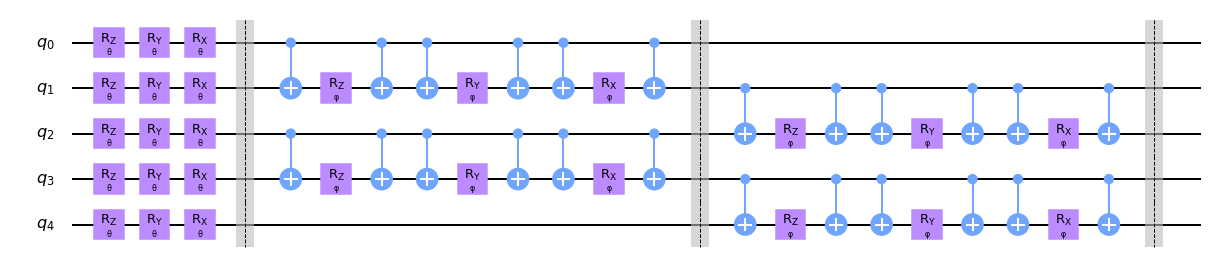

In [22]:
# define the number of qubits
num_q = 5
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(theta,i)
    qc.ry(theta,i)
    qc.rx(theta,i)
    
qc.barrier()
    
for i in range(num_q-1):
    if ((i%2)==0 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(phi,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.ry(phi,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.rx(phi,i+1)
        qc.cx(i,i+1)
        
qc.barrier()

for i in range(num_q-1):
    if ((i%2)==1 and (i <= (num_q)-2)):
        qc.cx(i,i+1)
        qc.rz(phi,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.ry(phi,i+1)
        qc.cx(i,i+1)
        qc.cx(i,i+1)
        qc.rx(phi,i+1)
        qc.cx(i,i+1)          
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

A Trotter step for the 2 spins case Heisenberg model has '6 CNOT' gates and '9 rotation gates'. Fortunately it is possible to reduce the number of CNOT gates by using the following identity [4]

$$ e^{-it\hbar J(\sigma_{1}^{x}\sigma_{2}^{x}+\sigma_{1}^{y}\sigma_{2}^{y}+\sigma_{1}^{z}\sigma_{2}^{z})} = R^{1}_{z}(\frac{pi}{2})CNOT^{2,1}R^{2}_{y}(\frac{pi}{2}-2t\hbar J)CNOT^{1,2}R^{2}_{y}(2t\hbar J-\frac{pi}{2})R^{1}_{z}(\frac{pi}{2}-2t\hbar J)CNOT^{2,1}R^{2}_{z}(-\frac{pi}{2})\;\;\;\;\;(28)$$

where H is the Hadamard gate. Now, the nearest neighbor term in the Heisenberg model contains 3 CNOT gates, as opposed to 6 in the previous decomposition.

The implementation in Qiskit is


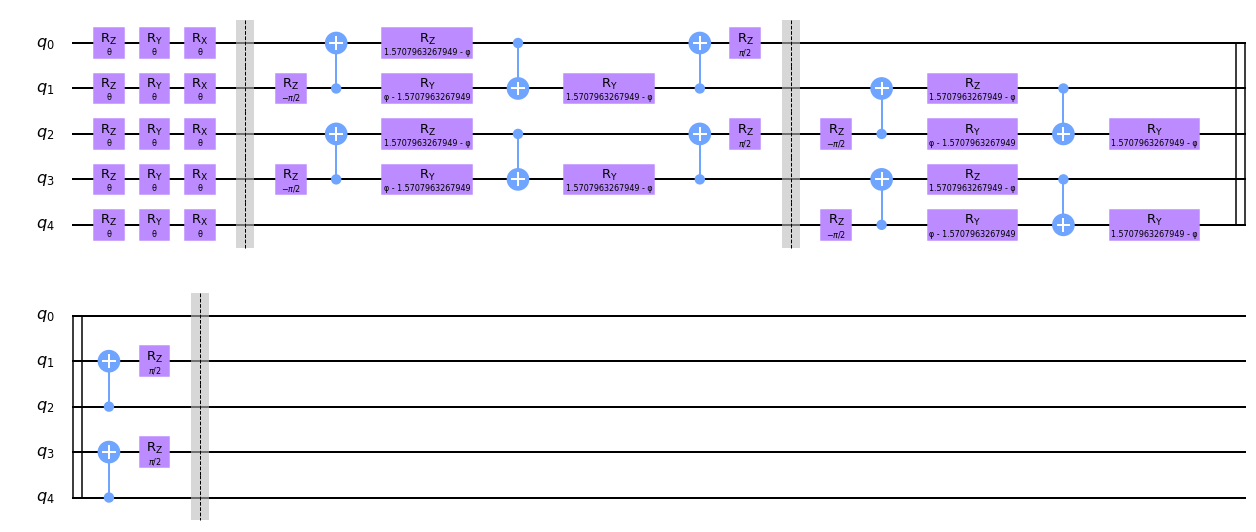

In [27]:
# define the number of qubits
num_q = 5
# Here create the quantum circuit with one qubit
qc = QuantumCircuit(num_q)

# Here is the loop that applies the Rz, Rx, and Ry gates to the ith-qubit
for i in range(num_q):
    qc.rz(theta,i)
    qc.ry(theta,i)
    qc.rx(theta,i)
    
qc.barrier()
    
for i in range(num_q-1):
    if ((i%2)==0 and (i <= (num_q)-2)):
        qc.rz(-pi/2,i+1)
        qc.cx(i+1,i)
        qc.rz(pi/2-phi,i)
        qc.ry(phi-pi/2,i+1)
        qc.cx(i,i+1)
        qc.ry(pi/2-phi,i+1)
        qc.cx(i+1,i)
        qc.rz(pi/2,i)

qc.barrier()

for i in range(num_q-1):
    if ((i%2)==1 and (i <= (num_q)-2)):
        qc.rz(-pi/2,i+1)
        qc.cx(i+1,i)
        qc.rz(pi/2-phi,i)
        qc.ry(phi-pi/2,i+1)
        qc.cx(i,i+1)
        qc.ry(pi/2-phi,i+1)
        qc.cx(i+1,i)
        qc.rz(pi/2,i)
    
qc.barrier()

# Here we draw the quantum circuit
qc.draw(output='mpl')

A recent paper implements an specific case of the Heisenberg model for a 1D chaing (the XXZ model) with a magnetic field pointing in the z-direction [5] 


# References

[1] N.W. Ashcroft and N.D. Mermin, $\textit{Solid State Physics}$ (Saunders college, Philadelphia, 1976). 

[2] P. Jordan and E. Wigner, Über das Paulische Äquivalenzverbot, Z. Phys. $\bf{47}$, 631 (1928).

[3] M. Suzuki, General theory of fractal path integrals with applications to many‐body theories and statistical physics, J. Math. Phys. $\bf{32}$, 400 (1991).

[4] F. Vatan and C. Williams, Optimal quantum circuits for general two qubit gates, Phys.Rev. A $\bf{69}$, 032315 (2004).

[5] A. Smith, M. S. Kim, F. Pollmann, and J.Knolle, Simulating quantum many-body dynamics on a current digital quantum computer, npj Quantum Information $\bf{5}$, 106 (2019).